In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
area
volumn = meshmask.e1t[0] * meshmask.e2t[0] * meshmask.e3t_0[0]
volumn = volumn.rename({'z' : 'depth'})
volumn = volumn.rename({'y' : 'gridY'})
volumn = volumn.rename({'x' : 'gridX'})
volumn 

<xarray.DataArray (gridY: 898, gridX: 398, depth: 40)>
array([[[ 185243.37452372,  185244.08957647,  185245.48230844, ...,
         4988602.12148864, 4988890.54061969, 4989038.63339594],
        [ 190803.49776947,  190804.23428469,  190805.66881984, ...,
         5138336.18183385, 5138633.25793263, 5138785.79574822],
        [ 194672.17811027,  194672.92955888,  194674.39318027, ...,
         5242519.70259455, 5242822.80212832, 5242978.43275958],
        ...,
        [ 231245.03207738,  231245.92469983,  231247.66329022, ...,
         6227426.27406199, 6227786.3165811 , 6227971.18537267],
        [ 231250.84481954,  231251.73746443,  231253.47609851, ...,
         6227582.81114701, 6227942.8627164 , 6228127.73615497],
        [ 231256.65316662,  231257.54583394,  231259.28451169, ...,
         6227739.22987272, 6228099.29048557, 6228284.16856761]],

       [[ 185143.43441715,  185144.14908412,  185145.5410647 , ...,
         4985910.73547314, 4986198.99900004, 4986347.01187919],
        [ 190700.34398872,  190701.08010577,  190702.51386536, ...,
         5135558.25160667, 5135855.16709769, 5136007.62244701],
        [ 194576.87296009,  194577.62404081,  194579.08694566, ...,
         5239953.13590566, 5240256.08705178, 5240411.64149136],
...
        [ 177713.73998053,  177714.42596835,  177715.76208959, ...,
         4785829.142683  , 4786105.8383683 , 4786247.91157982],
        [ 177057.6964592 ,  177058.37991464,  177059.71110349, ...,
         4768161.89757515, 4768437.5718177 , 4768579.12055537],
        [ 176408.84861791,  176409.52956875,  176410.85587931, ...,
         4750688.43205494, 4750963.09605822, 4751104.12607462]],

       [[ 238327.01473203,  238327.93469145,  238329.72652694, ...,
         6418143.99223245, 6418515.06121492, 6418705.59169602],
        [ 238155.19081508,  238156.11011125,  238157.9006549 , ...,
         6413516.77596178, 6413887.57741887, 6414077.97053537],
        [ 237066.46303945,  237067.37813305,  237069.16049122, ...,
         6384197.3484508 , 6384566.45478697, 6384755.97752028],
        ...,
        [ 177165.58040949,  177166.26428137,  177167.59628134, ...,
         4771067.2112183 , 4771343.05343336, 4771484.68841883],
        [ 176356.6297533 ,  176357.31050258,  176358.63642053, ...,
         4749282.17858214, 4749556.761282  , 4749697.74955204],
        [ 175504.07273636,  175504.7501947 ,  175506.0697028 , ...,
         4726322.82711085, 4726596.08240155, 4726736.38909506]]])
Dimensions without coordinates: gridY, gridX, depth

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
new_data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_oxygen_20180101_20201231.nc')
new_data = new_data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
new_data = new_data.assign_coords(time = time_values)
new_data

<xarray.Dataset>
Dimensions:           (time: 36, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth             (depth) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
  * gridY             (gridY) int64 0 1 2 3 4 5 6 ... 892 893 894 895 896 897
  * gridX             (gridX) int64 0 1 2 3 4 5 6 ... 392 393 394 395 396 397
  * time              (time) <U7 '2018-01' '2018-02' ... '2020-11' '2020-12'
Data variables:
    dissolved_oxygen  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_oxygen_20180101_20201231
    description:  Month-averaged Oxygen extracted from SalishSeaCast v202111 ...
    history:      2023-12-02 23:13 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [5]:
jan18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180101_20180131.nc'
feb18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180201_20180228.nc'
mar18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180301_20180331.nc'
apr18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180401_20180430.nc'
may18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180501_20180531.nc'
jun18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180601_20180630.nc'
jul18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180701_20180731.nc'
aug18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180801_20180831.nc'
sep18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180901_20180930.nc'
octo18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181001_20181031.nc'
nov18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181101_20181130.nc'
dec18 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181201_20181231.nc'

jan19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190101_20190131.nc'
feb19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190201_20190228.nc'
mar19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190301_20190331.nc'
apr19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190401_20190430.nc'
may19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190501_20190531.nc'
jun19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190601_20190630.nc'
jul19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190701_20190731.nc'
aug19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190801_20190831.nc'
sep19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20190901_20190930.nc'
octo19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191001_20191031.nc'
nov19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191101_20191130.nc'
dec19 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20191201_20191231.nc'

jan20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200101_20200131.nc'
feb20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200201_20200229.nc'
mar20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200301_20200331.nc'
apr20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200401_20200430.nc'
may20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200501_20200531.nc'
jun20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200601_20200630.nc'
jul20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200701_20200731.nc'
aug20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200801_20200831.nc'
sep20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20200901_20200930.nc'
octo20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201001_20201031.nc'
nov20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201101_20201130.nc'
dec20 = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20201201_20201231.nc'


In [6]:
jan_file_list = glob.glob(jan18)
feb_file_list = glob.glob(feb18)
mar_file_list = glob.glob(mar18)
apr_file_list = glob.glob(apr18)
may_file_list = glob.glob(may18)
jun_file_list = glob.glob(jun18)
jul_file_list = glob.glob(jul18)
aug_file_list = glob.glob(aug18)
sep_file_list = glob.glob(sep18)
octo_file_list = glob.glob(octo18)
nov_file_list = glob.glob(nov18)
dec_file_list = glob.glob(dec18)

jan_file_list19 = glob.glob(jan19)
feb_file_list19 = glob.glob(feb19)
mar_file_list19 = glob.glob(mar19)
apr_file_list19 = glob.glob(apr19)
may_file_list19 = glob.glob(may19)
jun_file_list19 = glob.glob(jun19)
jul_file_list19 = glob.glob(jul19)
aug_file_list19 = glob.glob(aug19)
sep_file_list19 = glob.glob(sep19)
octo_file_list19 = glob.glob(octo19)
nov_file_list19 = glob.glob(nov19)
dec_file_list19 = glob.glob(dec19)

jan_file_list20 = glob.glob(jan20)
feb_file_list20 = glob.glob(feb20)
mar_file_list20 = glob.glob(mar20)
apr_file_list20 = glob.glob(apr20)
may_file_list20 = glob.glob(may20)
jun_file_list20 = glob.glob(jun20)
jul_file_list20 = glob.glob(jul20)
aug_file_list20 = glob.glob(aug20)
sep_file_list20 = glob.glob(sep20)
octo_file_list20 = glob.glob(octo20)
nov_file_list20 = glob.glob(nov20)
dec_file_list20 = glob.glob(dec20)

In [7]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list + jan_file_list19 + feb_file_list19 + mar_file_list19 + apr_file_list19 + may_file_list19 + jun_file_list19 + jul_file_list19 + aug_file_list19 + sep_file_list19 + octo_file_list19 + nov_file_list19 +dec_file_list19 + jan_file_list20 + feb_file_list20 + mar_file_list20 + apr_file_list20 + may_file_list20 + jun_file_list20 + jul_file_list20 + aug_file_list20 + sep_file_list20 + octo_file_list20 + nov_file_list20 + dec_file_list20
base_data_oxygen = xr.open_mfdataset(all_file_list, data_vars=['dissolved_oxygen'])


In [8]:
base_data_oxygen = base_data_oxygen.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01','2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']
base_data_oxygen = base_data_oxygen.assign_coords(time = time_values)

In [9]:
diff_oxygen = new_data['dissolved_oxygen'] - base_data_oxygen['dissolved_oxygen']
diff_oxygen

<xarray.DataArray 'dissolved_oxygen' (time: 36, depth: 40, gridY: 898,
                                      gridX: 398)>
dask.array<subtract, shape=(36, 40, 898, 398), dtype=float32, chunksize=(1, 40, 898, 398), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

In [10]:
new_total_oxygen = (new_data['dissolved_oxygen'] * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0)
new_total_oxygen

<xarray.DataArray (time: 36, depth: 40)>
array([[259.51822193, 259.43531748, 258.44781644, ..., 121.58851041,
        121.71621027,          nan],
       [281.07504208, 281.09622018, 280.17548375, ..., 121.77525908,
        121.72565962,          nan],
       [306.22066457, 306.32694696, 304.98417913, ..., 121.81797722,
        121.67444247,          nan],
       ...,
       [230.29403214, 229.4895225 , 227.86714734, ..., 127.48087857,
        127.91310424,          nan],
       [244.46779585, 244.23686427, 243.21518782, ..., 128.05028826,
        128.62407057,          nan],
       [261.45418003, 261.30839291, 260.29596073, ..., 127.99707768,
        128.54690281,          nan]])
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

Text(1.02, 0.5, 'Total Dissolved Oxygen [$mmol/m^3$]')

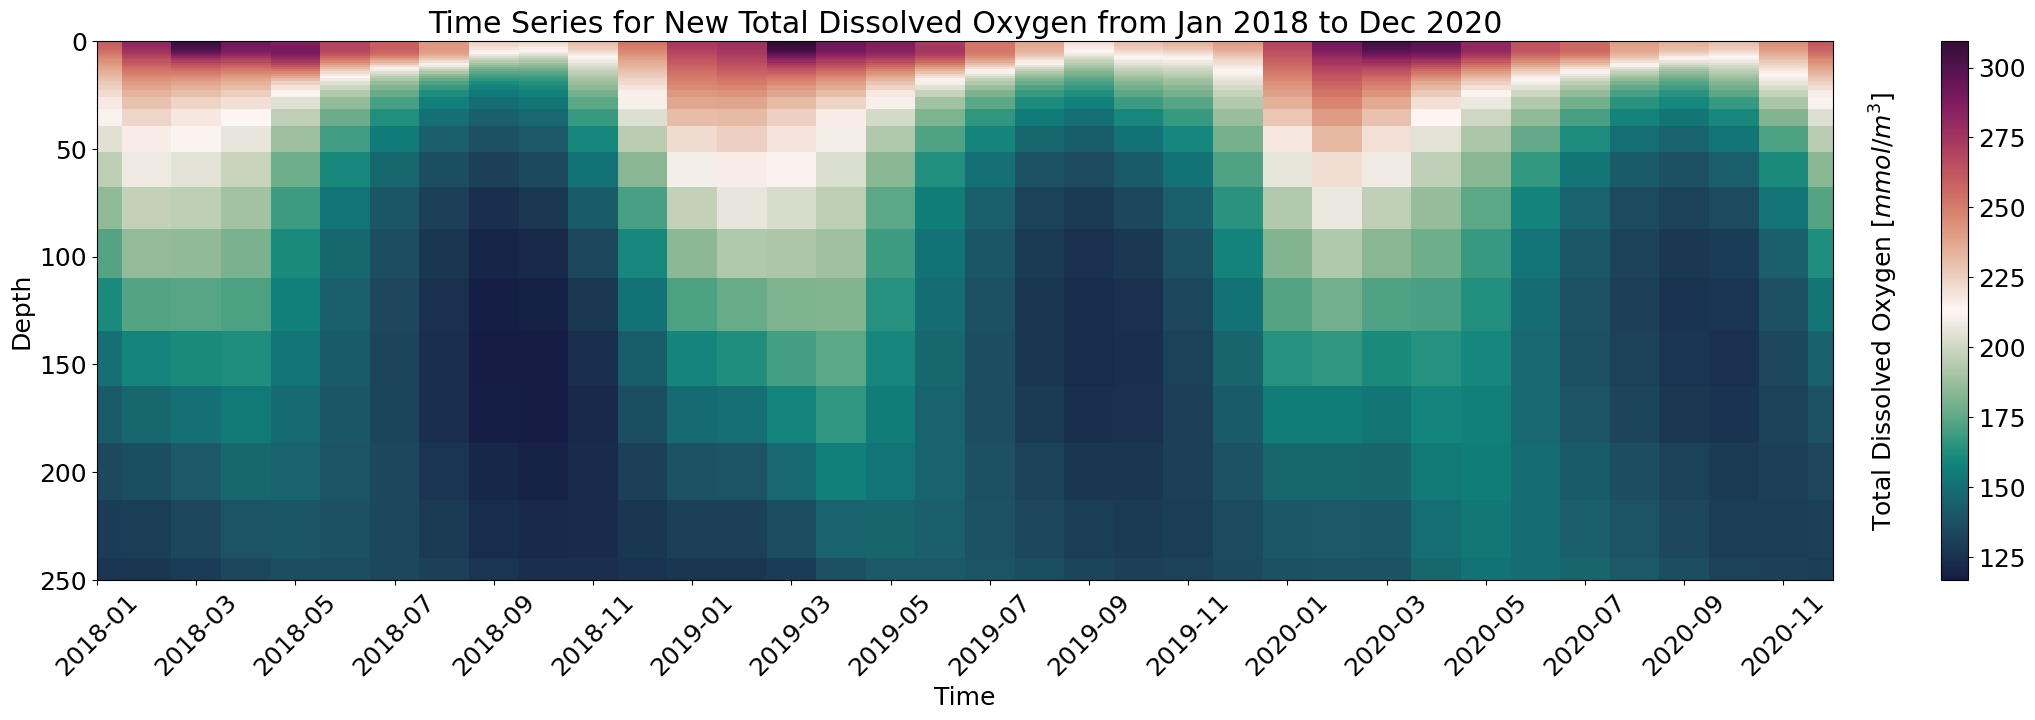

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(28, 7))
plt.rcParams.update({'font.size': 18})
new_total_oxygen.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for New Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Depth')
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Dissolved Oxygen [$mmol/m^3$]'  # Replace with the desired label text
label_x = 1.02  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center')


In [12]:
base_total_oxygen = (base_data_oxygen['dissolved_oxygen'] * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0)


Text(1.02, 0.5, 'Total Dissolved Oxygen [$mmol/m^3$]')

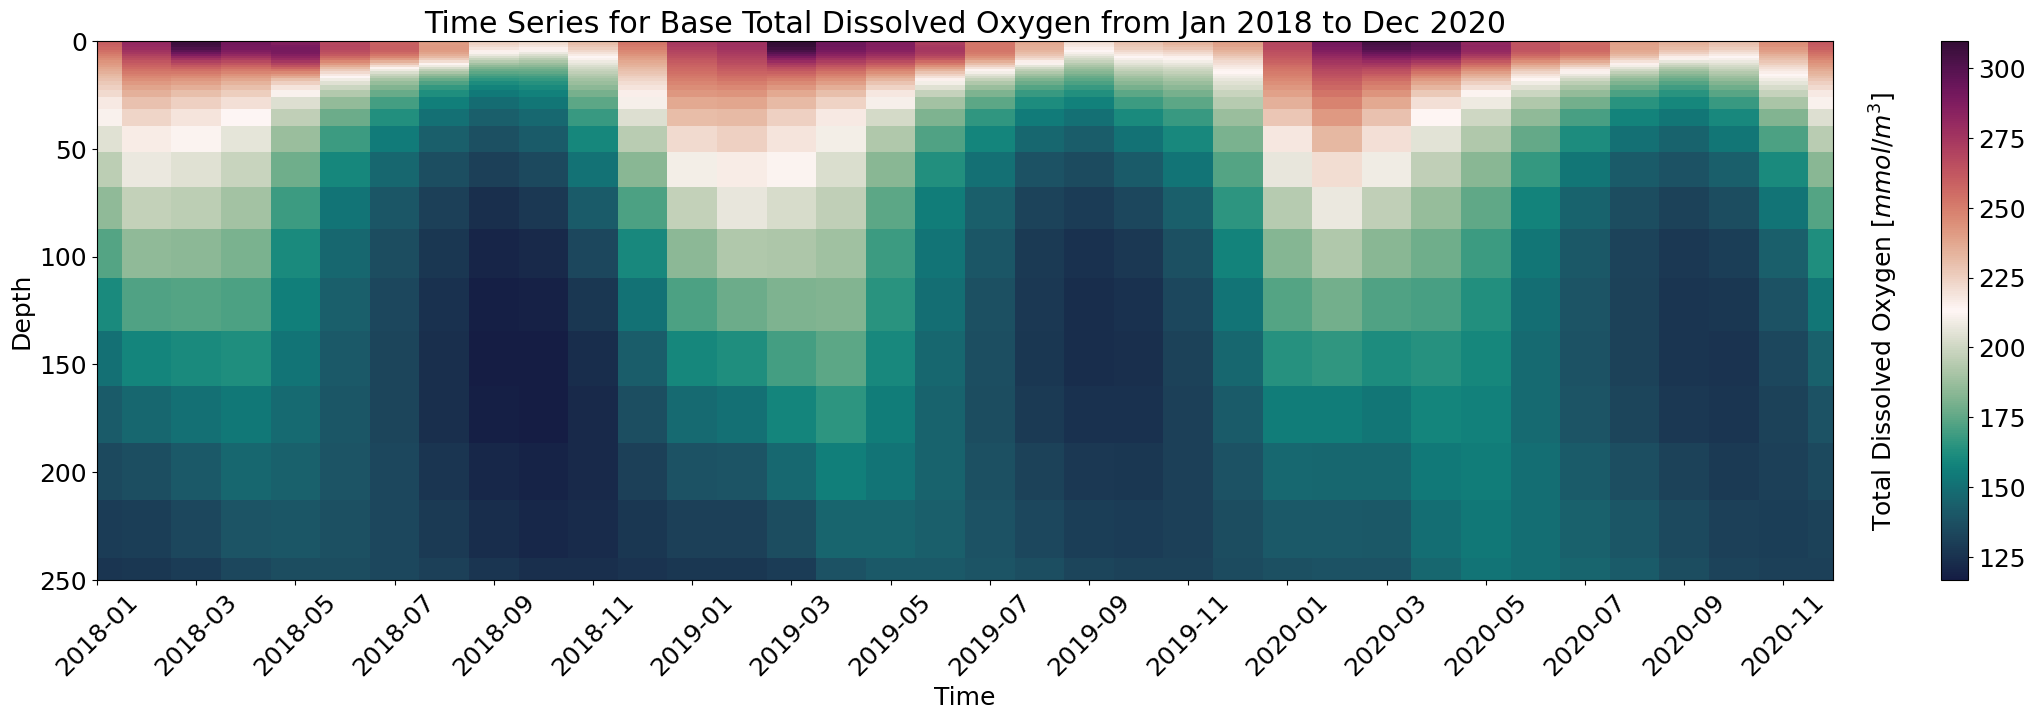

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(28, 7))
plt.rcParams.update({'font.size': 18})
base_total_oxygen.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Base Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Depth')
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Dissolved Oxygen [$mmol/m^3$]'  # Replace with the desired label text
label_x = 1.02  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center')


In [14]:
diff_total_oxygen = (diff_oxygen * area).where(tmask).sum(axis = 2).sum(axis = 2) / area.where(tmask).sum(axis = 0).sum(axis = 0)
diff_total_oxygen

<xarray.DataArray (time: 36, depth: 40)>
dask.array<truediv, shape=(36, 40), dtype=float64, chunksize=(1, 40), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

Text(1.02, 0.5, 'Total Dissolved Oxygen [$mmol/m^3$]')

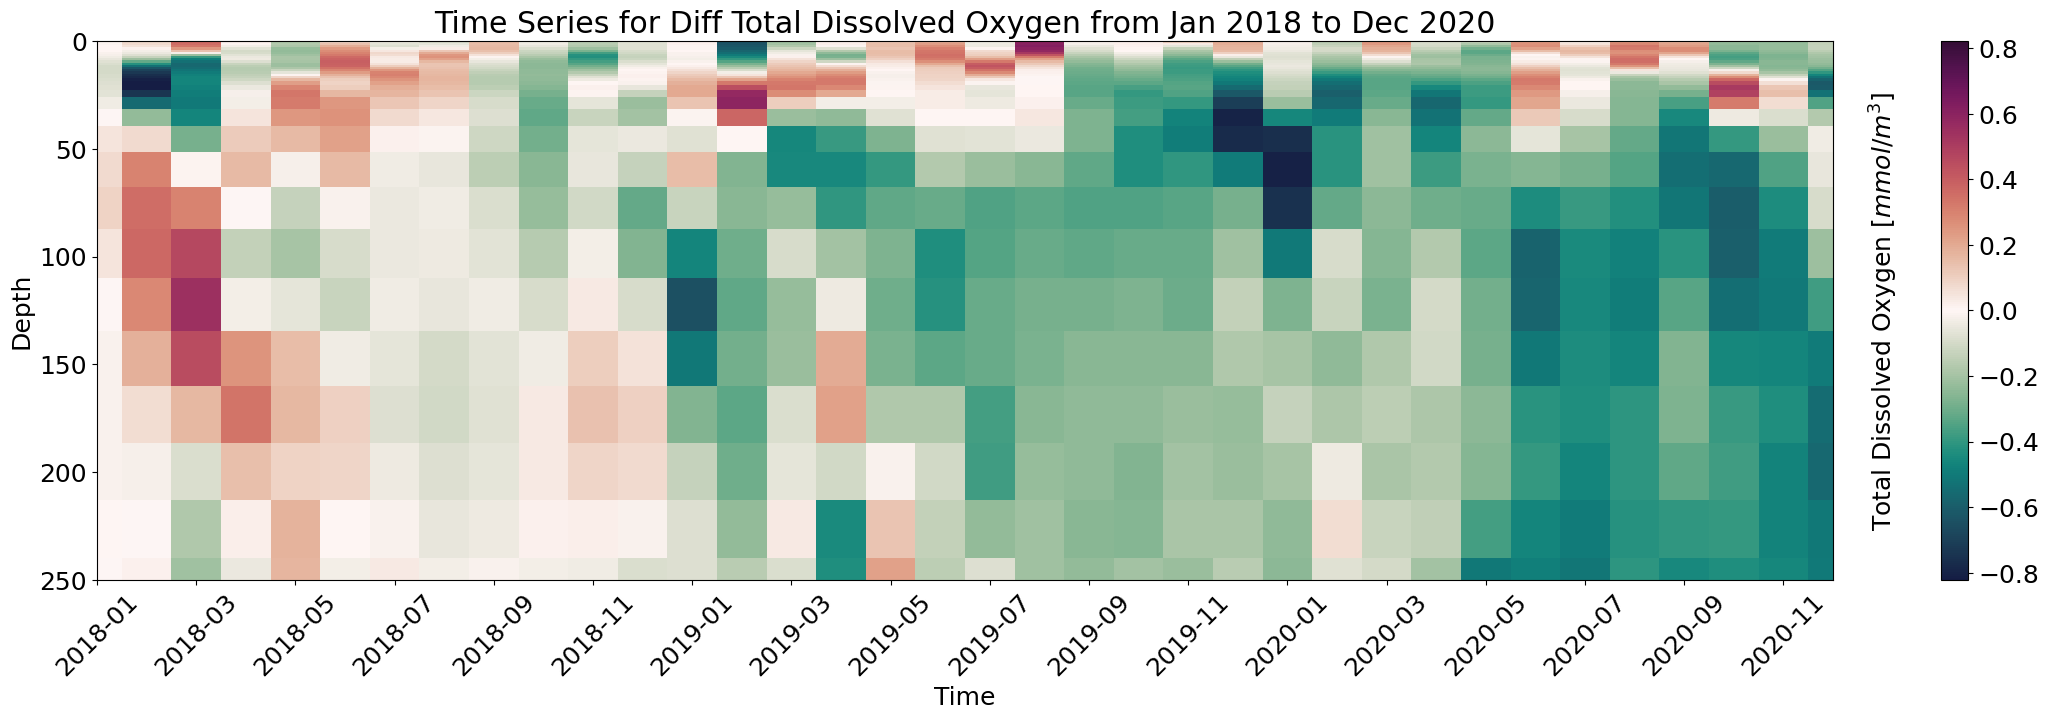

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(28, 7))
plt.rcParams.update({'font.size': 18})
diff_total_oxygen.plot(ax = axs, y = "depth", yincrease = False, cmap = cm_vel)
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_ylim(250, 0)
axs.set_title(f'Time Series for Diff Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Depth')
plt.setp(axs.get_xticklabels(), rotation=45)

label_text = 'Total Dissolved Oxygen [$mmol/m^3$]'  # Replace with the desired label text
label_x = 1.02  # Adjust the position of the label on the x-axis as needed
label_y = 0.5  # Adjust the position of the label on the y-axis as needed
axs.text(label_x, label_y, label_text, transform=axs.transAxes, rotation=90, va='center')


In [16]:
new_dissolved_oxygen_sum = (new_data['dissolved_oxygen'] * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
new_dissolved_oxygen_sum

<xarray.DataArray (time: 36)>
array([4.21003174e+14, 4.44959813e+14, 4.47866619e+14, 4.42251170e+14,
       4.18016286e+14, 3.86453881e+14, 3.62832711e+14, 3.39987426e+14,
       3.20799246e+14, 3.22512978e+14, 3.49070891e+14, 4.02543115e+14,
       4.47350972e+14, 4.57101959e+14, 4.62115927e+14, 4.57071223e+14,
       4.28932558e+14, 3.97558704e+14, 3.70644745e+14, 3.46417436e+14,
       3.33458393e+14, 3.43658680e+14, 3.57594314e+14, 3.92509524e+14,
       4.49779648e+14, 4.71603436e+14, 4.59366273e+14, 4.48702730e+14,
       4.30720380e+14, 4.01210202e+14, 3.77753759e+14, 3.55048326e+14,
       3.41285234e+14, 3.45504346e+14, 3.75156972e+14, 4.08966581e+14])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

In [17]:
base_data_oxygen_sum = (base_data_oxygen['dissolved_oxygen'] * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
base_data_oxygen_sum

<xarray.DataArray (time: 36)>
dask.array<sum-aggregate, shape=(36,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

In [18]:
diff_oxygen_sum = (diff_oxygen * volumn).where(tmask).sum(axis = 1).sum(axis = 1).sum(axis = 1)
diff_oxygen_sum

<xarray.DataArray (time: 36)>
dask.array<sum-aggregate, shape=(36,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2020-11' '2020-12'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

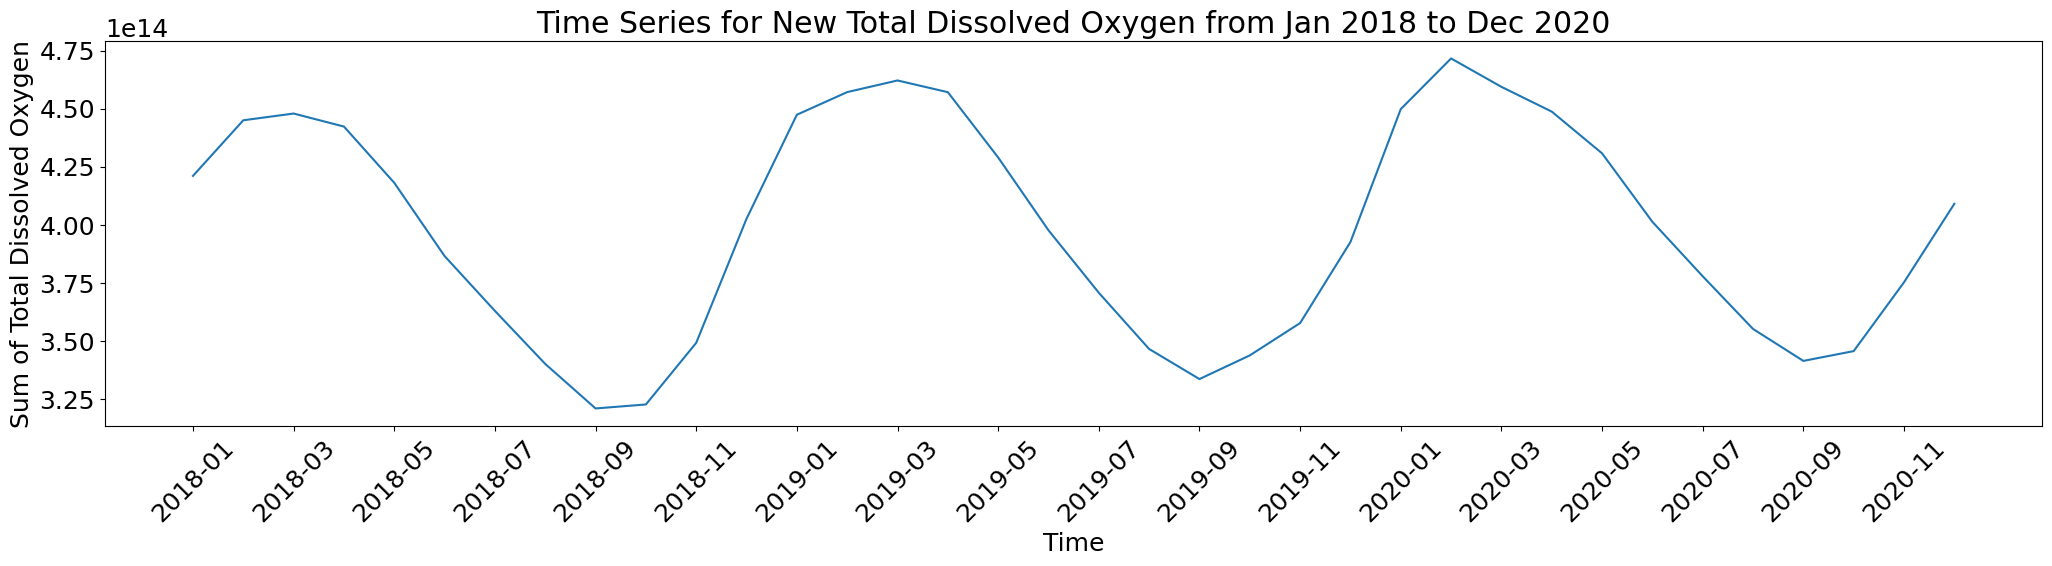

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 18})
new_dissolved_oxygen_sum.plot(ax=axs) 
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_title(f'Time Series for New Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Dissolved Oxygen') 
#axs.set_ylim([0, 2.25e8])
plt.setp(axs.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

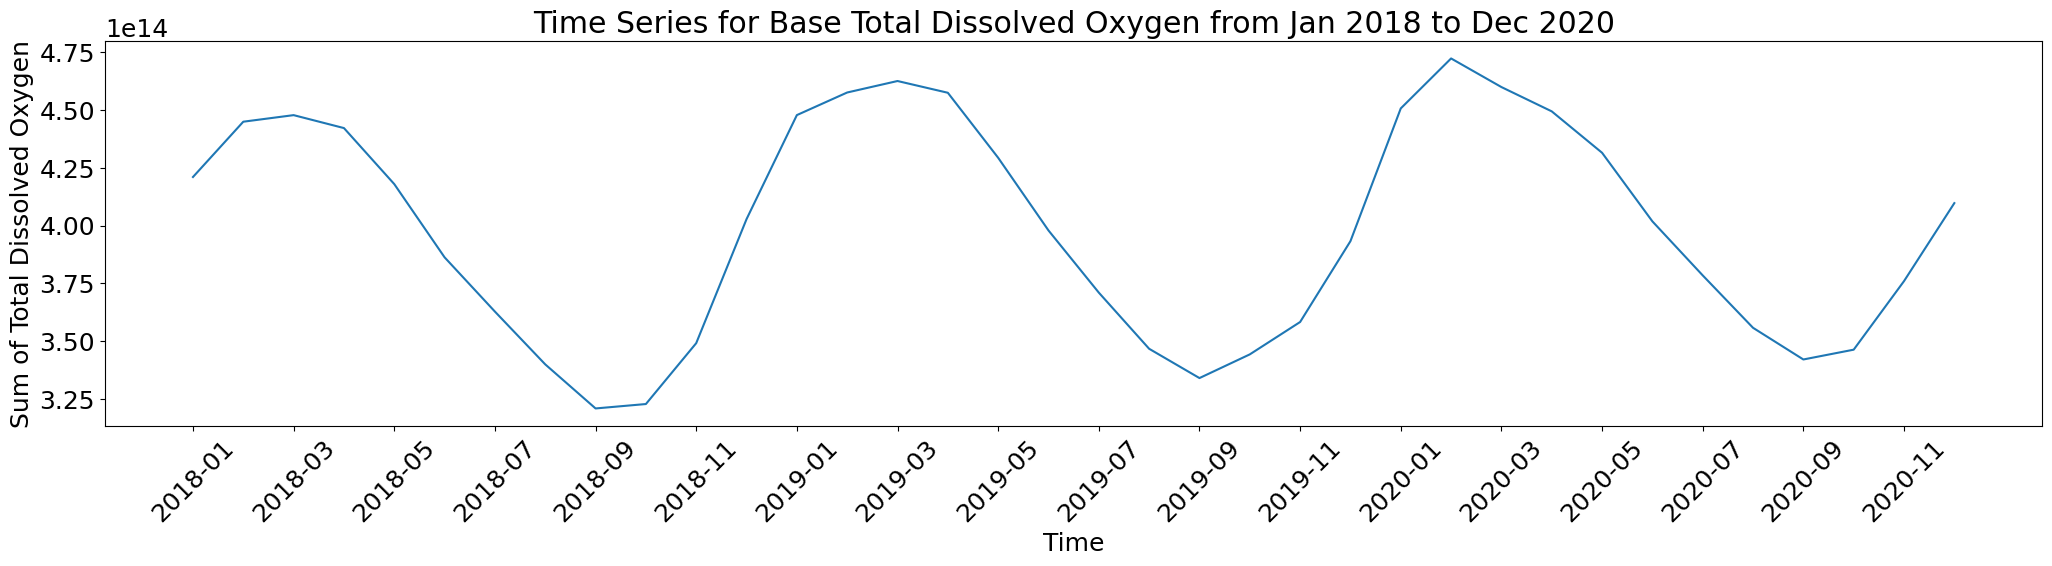

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 18})
base_data_oxygen_sum.plot(ax=axs) 
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_title(f'Time Series for Base Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Dissolved Oxygen') 
#axs.set_ylim([0, 2.25e8])
plt.setp(axs.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

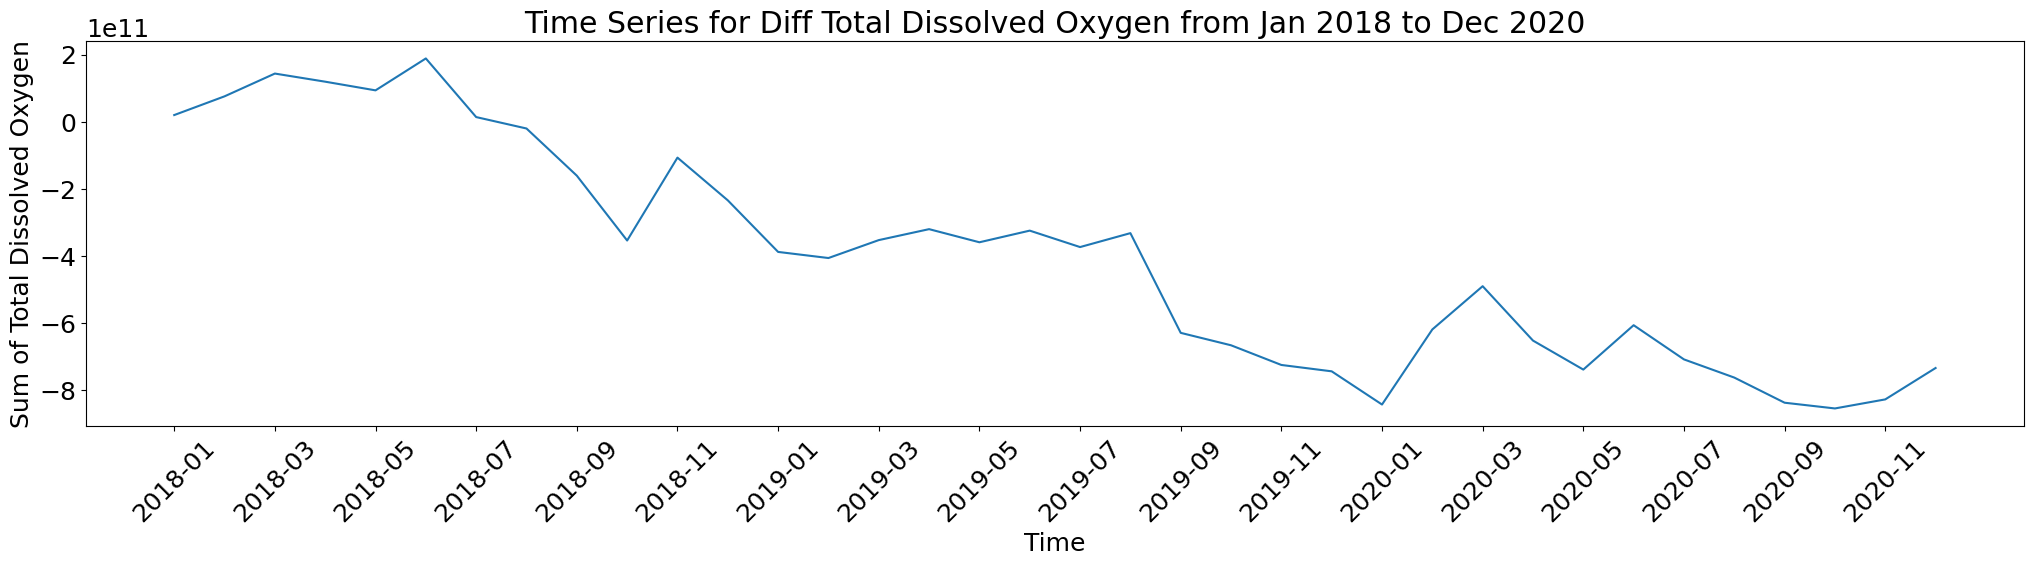

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 18})
diff_oxygen_sum.plot(ax=axs) 
displayed_time_index = time_values[::2]
axs.set_xticks(displayed_time_index)
axs.set_title(f'Time Series for Diff Total Dissolved Oxygen from Jan 2018 to Dec 2020')
axs.set_xlabel('Time')
axs.set_ylabel('Sum of Total Dissolved Oxygen') 
#axs.set_ylim([0, 2.25e8])
plt.setp(axs.get_xticklabels(), rotation=45)